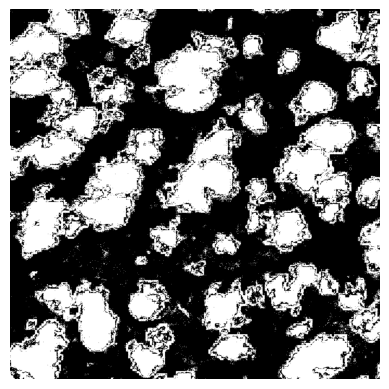

/var/folders/dn/l0v3spf94pq616k_0n39k87w0000gn/T/ipykernel_95082/1498350525.py:77: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_df = df.style.applymap(apply_background_color)


,Square 1,Square 2,Square 3
Row 1,46.030736,34.785563,31.229522
Row 2,48.683792,39.100971,41.815086
Row 3,35.496771,32.898754,38.171326


Total White Pixels: 38.69%


In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML

def calculate_white_percentage(image_array):
    white_threshold = 255
    white_pixels = np.sum(image_array == white_threshold)
    total_pixels = image_array.size
    white_percentage = (white_pixels / total_pixels) * 100
    return white_percentage

def apply_background_color(value):
    if value > 50:
        color = 'red'
    elif value > 40:
        color = 'yellow'
    elif value < 40:
        color = 'green'
    else:
        color = 'red'
    return f'background-color: {color}'

# Load the image
image = Image.open('mask.png')

# Convert the image to RGB format
image_rgb = image.convert('RGB')

# Convert the image to grayscale
grayscale_image = image_rgb.convert('L')

# Convert to numpy array
image_array = np.array(grayscale_image)

#General Percentage calculation
white_threshold = 255
# Count white pixels
white_pixels = np.sum(image_array == white_threshold)
# Calculate total number of pixels
total_pixels = image_array.size
white_percentage = (white_pixels / total_pixels) * 100

# Get image dimensions
height, width = image_array.shape

# Define square size
square_height = height // 3
square_width = width // 3

# Initialize a list to store white percentages
white_percentages = []

# Loop through each square
for i in range(3):
    row_percentages = []
    for j in range(3):
        start_row = i * square_height
        end_row = (i + 1) * square_height
        start_col = j * square_width
        end_col = (j + 1) * square_width
        square = image_array[start_row:end_row, start_col:end_col]
        white_percentage1 = calculate_white_percentage(square)
        row_percentages.append(white_percentage1)
    white_percentages.append(row_percentages)

# Display the image
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

# Create a DataFrame
df = pd.DataFrame(white_percentages, columns=['Square 1', 'Square 2', 'Square 3'], index=['Row 1', 'Row 2', 'Row 3'])

# Apply conditional formatting
styled_df = df.style.applymap(apply_background_color)
display(styled_df)

# Print the percentages
print(f'Total White Pixels: {white_percentage:.2f}%')